# Credit Card Fraud Detection
The creditcard.csv dataset contains data on credit card transactions made over a period of 2 days in September 2013 by European cardholders. The dataset contains a total of 31 variables, including time, amount, and 28 anonymous variables (V1-V28) which have been derived using a PCA transformation. The target variable is Class which takes on the value 1 in cases where the transaction was fraudulent and 0 otherwise. The dataset is highly unbalanced, with only 0.17% of transactions being classified as fraudulent. The purpose of this dataset is to build predictive models to identify fraudulent credit card transactions based on the given features.

Part 1. Load and Inspect the Dataset

In [24]:
# Load the necessary libraries
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv("creditcard.csv")

# View the first few rows of the data and checking information about the dataset
print(df.head()) #Note: dataset has 284807 rows and 31 columns
print(df.info()) #Note: here are no missing values in the dataset

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Part 2. Data Visualisation

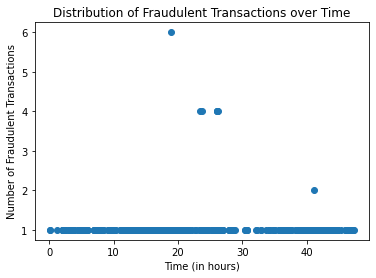

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subset of the data for the fraudulent transactions
fraud_df = df[df['Class'] == 1]

# Group the fraudulent transactions by time (in this case we'll use 'Time' column)
fraud_by_time = fraud_df.groupby('Time').count()['Class']

# Create a line plot to show the distribution of fraudulent transactions over time
plt.scatter(fraud_by_time.index/3600, fraud_by_time.values)
plt.xlabel('Time (in hours)')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions over Time')
plt.show()

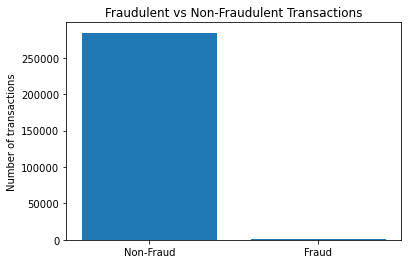

In [26]:
# Look at the distribution of fraudulent and non-fraudulent transactions using a bar chart
fraud_counts = df['Class'].value_counts()
plt.bar(['Non-Fraud', 'Fraud'], fraud_counts.values)
plt.ylabel('Number of transactions')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.show()

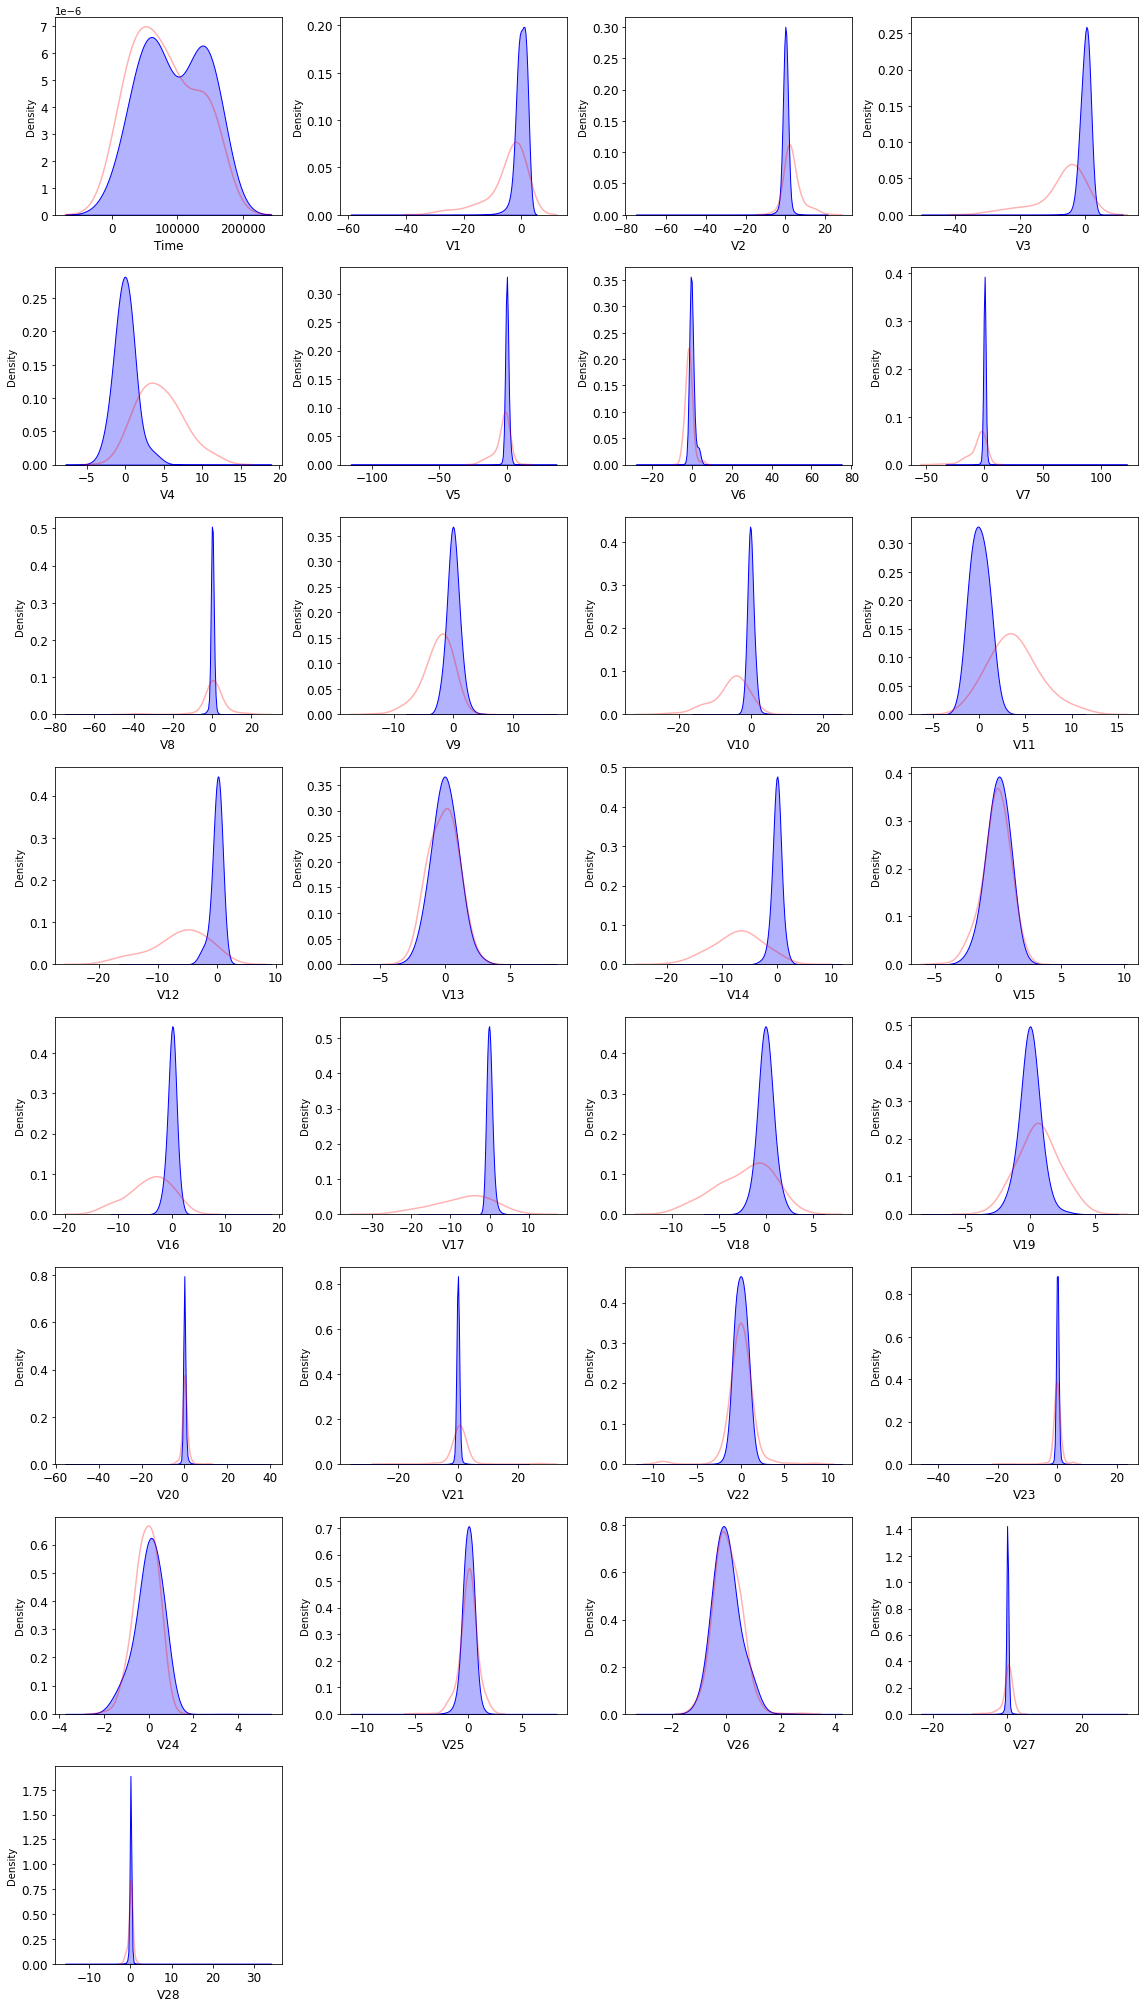

In [27]:
#Plot KDE plots for each feature in the creditcard.csv dataset for class 0 and class 1
# Separate data for class 0 and class 1
class0_df = df[df['Class'] == 0]
class1_df = df[df['Class'] == 1]

# Get the column names
features = df.columns.values[:-1]

num_features = len(features)
num_rows = num_features // 4 + int(num_features % 4 != 0)

fig, ax = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 28))

for idx, feature in enumerate(features):
    row = idx // 4
    col = idx % 4
    
    sns.kdeplot(class0_df[feature], bw_method=0.5, label="Class = 0", color='blue', fill=True, alpha=0.3, warn_singular=False, ax=ax[row, col])
    sns.kdeplot(class1_df[feature], bw_method=0.5, label="Class = 1", color='red', alpha=0.3, warn_singular=False, ax=ax[row, col])
    
    ax[row, col].set_xlabel(feature, fontsize=12)
    ax[row, col].tick_params(axis='both', which='major', labelsize=12)

# Remove any unused subplots + class
for remaining_ax in ax.flatten()[num_features-1:]:
    remaining_ax.remove()    
    
plt.tight_layout()
plt.show()

Observations:
1. Certain features showcase comparable distributions in both fraudulent and non-fraudulent transactions. 
2. There are some distinct variations in mean and flatness of other feature distributions, providing valuable insights for future predictions.

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64


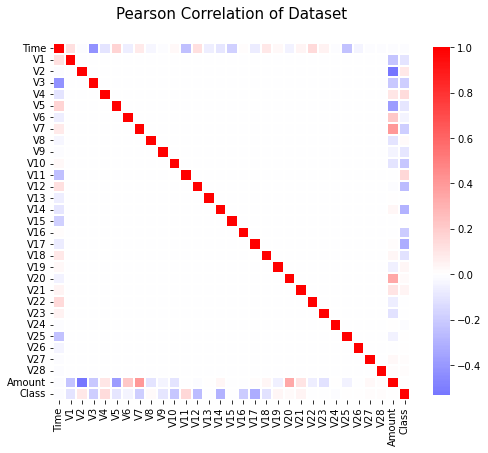

In [28]:
#Generates a heatmap of the Pearson correlation coefficients between numeric features in the creditcard.csv dataset
from matplotlib.colors import LinearSegmentedColormap

# Define color scheme for heatmap
red_color = "#FF0000"
blue_color = "#0000FF"
colors = [blue_color, "#ffffff", red_color]
color_positions = [1, 0, -1]
color_map = LinearSegmentedColormap.from_list("Custom", colors, N=256, gamma=1.0)

# Display the correlations between the target variable and the features
corr = df.corr('pearson')
print(corr.iloc[-1])

# Generate heatmap of Pearson correlation coefficients
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(
    df.corr('pearson'), 
    cmap=color_map,
    square=True, 
    center=0,
    cbar_kws={'shrink': .8}, 
    ax=ax,
    annot=False, 
    linewidths=0.1, 
    vmax=1.0, 
    linecolor='white',
)
plt.title('Pearson Correlation of Dataset', y=1.05, size=15)
plt.show()

Observations:

1. There is an extremely low correlation between the features.
2. The correlation between the target and transaction amount is negligible.

Part 3. Feature Selection Based on Correlation Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V16     284807 non-null  float64
 15  V17     284807 non-null  float64
 16  V18     284807 non-null  float64
 17  V19     284807 non-null  float64
 18  V20     284807 non-null  float64
 19  V21     284807 non-null  float64
 20  V27     284807 non-null  float64
 21  Class   28

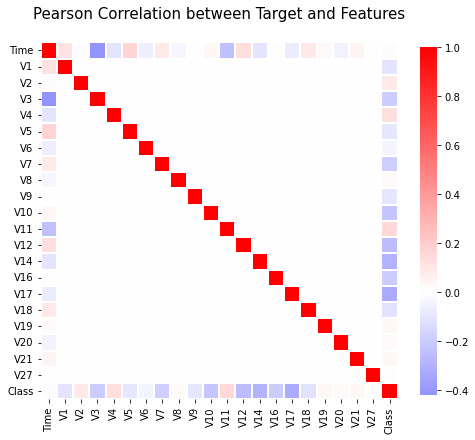

In [29]:
# Select only features with absolute correlation above 0.01 with the target variable
features = corr[abs(corr['Class']) > 0.01]['Class'].index.tolist()

# Remove the target variable from the list of features
features.remove('Class')

# Select only the relevant columns of the dataset
data = df[features + ['Class']]

print(data.info())

# Generate heatmap of Pearson correlation coefficients
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(
    data.corr('pearson'), 
    cmap=color_map,
    square=True, 
    center=0,
    cbar_kws={'shrink': .8}, 
    ax=ax,
    annot=False, 
    linewidths=0.1, 
    vmax=1.0, 
    linecolor='white',
)
plt.title('Pearson Correlation between Target and Features', y=1.05, size=15)
plt.show()

Part 4. Model Building and Evaluation

Note: Given the class imbalance ratio, I will measure the model accuracy in conjunction with the Area Under the Precision-Recall Curve (AUPRC).

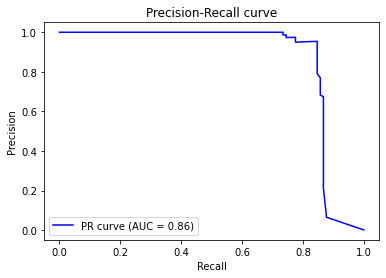

Accuracy score: 0.9995611109160493
PR curve AUC score: 0.8630104434455892


In [30]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, auc
from matplotlib import pyplot as plt
import numpy as np

# Split the data into features and target
X = data.drop(['Class'], axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy
acc_score = accuracy_score(y_test, y_pred)

# Calculate the precision-recall curve
y_score = clf.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score[:, 1])
prc_auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, color='blue', label=f'PR curve (AUC = {prc_auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()

# Print the evaluation metrics
print('Accuracy score:', acc_score)
print('PR curve AUC score:', prc_auc_score)

# Conclusion
The Random Forest classifier model performed exceptionally well in predicting credit card fraud with an accuracy score of 0.9996. This indicates that the model was able to correctly identify fraudulent transactions almost every time. Additionally, the precision-recall curve demonstrated that the model achieved good performance with an AUC score of 0.863. Although the precision-recall curve trade-off between precision and recall values may differ based on the specific application, for credit card fraud detection, both metrics are crucial to achieve a balance between correctly identifying fraudulent transactions while minimizing false positives. Overall, the evaluation metrics suggest that the Random Forest classifier model is highly effective in identifying fraudulent transactions in this dataset and, therefore, has valuable potential in detecting credit card fraud in real-world applications.